<div style="background-color:lightgrey;
            padding:10px;
            color:black;
            border:black dashed 2px; 
            border-radius:5px;
            margin: 20px 0;">
            
            
# Pandas Data Analysis



**Staff:** Ben Burtenshaw <br/>
**Support Material:** None <br/>
**Support Sessions:**  Thursday, October 14

<h2 style="color:purple">Datasets</h2>

- <a style="font-size:120%;color:blue" href="https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master--/data/titanic.csv">titanic.csv</a>
- <a style="font-size:120%;color:blue" href="https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master/data/311-service-requests.csv">311-service-requests.csv</a>
- <a style="font-size:120%;color:blue" href="https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master/data/bikes.csv">bikes.csv</a>
</div>

This session is split into two halves. The first part will explore Pandas, a Python package for tabular data analysis. The second part will explore the object oriented programming paradigm.

<div style="background-color:lightblue;
            padding:10px;
            color:black;
            border:blue solid 2px; 
            border-radius:5px;
            margin: 20px 0;
            text-align:center">
  
# PART 1 : Introduction to Pandas 

</div>

## An introduction to Pandas


#### Learning Objectives
- Understand what Pandas is used for
- Be able to implement the fundamental components of Pandas
- Be familiar with the Pandas approach


#### Programme
- What is Pandas?
- Why would I use it?
- How do I use Pandas?


In [ ]:
%matplotlib inline # this is magic (a "magic expression" that makes plots appear in the notebook)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV Files (Comma-Separated Values)

CSV's are a file type for storing tabular data. You may know them from Microsoft excel. They store data like this:

```
column1,column2,column3
index1,0,1
index2,3,2
index3,6,3
```

The commas separate the values in the table (hence the name), and the returns separate the lines.

In the above example, the first row and first column are used as a **header** to specify column names and the index. This is a best practice but not a necessity. 

## Opening CSVs in Pandas

Pandas works with all major forms of tabular data. It can even import Excel spreadsheets. However, most of the time we work with CSV's and Jsons

In [ ]:
help(pd.read_csv)

In [ ]:
df = pd.read_csv("titanic.csv") 

In [ ]:
df.head()

# The pandas data structures: `DataFrame` and `Series`

Pandas uses two main structures, a DataFrame and a Series. Understanding them will help you to use Pandas for data analysis.

In [ ]:
df

## DataFrame

A `DataFrame` is a tabular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns, like a spreadsheet.

The `DataFrame` is a kind of container object in a similar way as a `dictionary`. 

#### Characteristics  
- 2-dimensional data structure
- A table
- Similar to a spreadsheet
- An object type within Python

![dataframe](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)



### Attributes of the DataFrame

Like dictionaries have `keys` and `values`, the contents of a DataFrame can be accessed using a set of attributes. The primary attributes for `DataFrames` are as follows:

In [ ]:
df.index # row labels

Note that `index` in Pandas DataFrames refers to **rows**. The row labels above are continuous, 0-891, and thus summarized. That is different from the column labels as you'll see below.

In [ ]:
df.columns # column labels

The `values` attribute returns an array (a `numpy` version of lists) or arrays that contains the whole dataset.

In [ ]:
df.values

The `shape` attribute is very useful for getting a sense of the size of the dataset. The format is `(n_rows, n_columns)`.

In [ ]:
df.shape

DataFrames can contain all kinds of different object types. Standard Python objects like `int` or `str` are put into object types conducive for DataFrames. To check the data types of the different columns:

In [ ]:
df.dtypes

An overview of that information can be given with the `info()` method:

In [ ]:
df.info()

### Building DataFrames from Scratch.

#### With a list

Apart from importing your data from an external source (text file, excel, database, ..), it is also common to build dataframes from Python data structures like lists and dictionaries.

Note that with this method, each list represents a single observation or, in this case, a country. You could use other ordered objects as well, such as `tuples`: i.e. tuple of lists, list of tuples, tuple of tuples, list of lists.

In [ ]:
data = [
    ['Belgium', 11.3, 30510, 'Brussels'],
    ['France', 64.3, 671308, 'Paris'],
    ['Germany', 81.3, 357050, 'Berlin'],
    ['Netherlands', 16.9, 41526, 'Amsterdam'],
    ['United Kingdom', 64.9, 244820, 'London']
]

headers = ['country', 'population', 'area', 'capital'] # column headers

df_countries = pd.DataFrame(data, columns=headers) # what happens if we don't say `columns=headers`?
df_countries

#### With a dictionary

Rather than feeding a list of lists as rows, we can provide a dictionary of columns. In this case, the keys of the dictionary are the column labels and the values are some kind of ordered iterable (e.g. `list`, `tuple`, `pandas.Series`). 

Note that the items for each iterable should be in the order of the other iterables. For example, $64.3$ in 'population' should correspond with 'France' in 'country'.

In [ ]:
data = {
    'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
    'population': [11.3, 64.3, 81.3, 16.9, 64.9],
    'area': [30510, 671308, 357050, 41526, 244820],
    'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']
}
df_countries = pd.DataFrame(data)
df_countries

### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**, similar to a `list`, but possessing special methods and attributes for data analysis. A `DataFrame` consists of `Series` objects "glued" together. For instance, if we select the "Age" column below we'll see that the column *is* a `Series`.

#### Characteristics  
- 1 dimensional data structure
- Each **column** in a `DataFrame` is a `Series`
- Each **row** in a `DataFrame` is a `Series`

![series](https://pandas.pydata.org/docs/_images/01_table_series.svg)

In [ ]:
age = df['Age']
print(type(df['Age']))

In [ ]:
age

The `Series` has a lot of useful methods. Here are some examples:

In [ ]:
print('mean', age.mean())
print('max', age.max())
print('min', age.min())
print('mean', age.mean())
print('sum', age.sum())
print('quantile', age.quantile(1))

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [ ]:
age.index

You can access the underlying numpy array representation with the `.values` attribute:

In [ ]:
age.values[:10]

We can access series values via the index, just like for NumPy arrays:

In [ ]:
age[0]

Unlike the NumPy array, though, this index can be something other than integers:

In [ ]:
df = df.set_index('Name')
df

In [ ]:
age = df['Age']
age

In [ ]:
age['Dooley, Mr. Patrick']

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [ ]:
age * 1000

A range of methods:

In [ ]:
age.mean()

Fancy indexing, like indexing with a list or boolean indexing:

In [ ]:
age[age > 70]

But also a lot of pandas specific methods, e.g.

In [ ]:
df['Embarked'].value_counts()

<div style="background-color: lightgreen;
color: black;
padding: 10px;
border: green 3px solid;
border-radius: 10px;
     width:50%">
    
<h1>Exercise</h1>
<ul>
<li>What is the age distribution of the Titanic passengers?</li>
<li>What is the maximum Fare that was paid? And the median?</li>
<li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
    </ul>
</div>

# Selecting and filtering data

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [ ]:
df['Age']

or multiple columns:

In [ ]:
df[['Age', 'Fare']]

But, slicing accesses the rows:

In [ ]:
df[10:15]

### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [ ]:
df = df.set_index('Name')

Note that we've now changed the index to the `Name` column:

In [ ]:
df.head()

In [ ]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

In [ ]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [ ]:
df.iloc[0:2,1:3]

The different indexing methods can also be used to assign data:

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [ ]:
df

### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [ ]:
df['Fare'] > 50

In [ ]:
df[df['Fare'] > 50]

<div style="background-color:lightblue;
            padding:10px;
            color:black;
            border:blue solid 2px; 
            border-radius:5px;
            margin: 20px 0;
            text-align:center">
  
# PART 2 : Solving Real Problems Pandas 

</div>

In this part of the class we will work on group problems using a series of datasets.

<div style="
color: blue;
padding: 10px;
border: blue 3px solid;
border-radius: 10px;
     width:50%">
    
<h1>What's the most common complaint type?</h1>
</div>


There's a `.value_counts()` method that we can use:

If we just wanted the top 10 most common complaints, we can do this:

In [ ]:
# we will import on a table on complaint call data

complaints = pd.read_csv('311-service-requests.csv', dtype='unicode')
complaints.head()

In [ ]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

But it gets better! We can plot them!

In [ ]:
complaint_counts[:10].plot(kind='bar')

This quick set of methods unwraps a large table and communicates it clearly based on a query.

## Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [ ]:
complaints.head()

To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [36]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013.0,171076.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577.0,140964.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [37]:
# we can use boolean indexing
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [38]:
# these are our bollean indexes
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk" 
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937.0,170310.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366.0,180388.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925.0,203271.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,Precinct,Closed,10/31/2013 06:02:58 AM,10/30/2013 10:23:20 PM,01 BROOKLYN,BROOKLYN,991895.0,171051.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,CHURCH AVENUE,EAST 2 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 04:38:25 AM,10/30/2013 10:26:28 PM,12 BROOKLYN,BROOKLYN,990144.0,173511.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


Or if we just wanted a few columns:

In [39]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


<div style="
color: blue;
padding: 10px;
border: blue 3px solid;
border-radius: 10px;
     width:50%">
    
<h1>So, which borough has the most noise complaints?</h1>
</div>

In [46]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [47]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [48]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

Oops, why was that zero? That's no good. This is because of integer division in Python 2. Let's fix it, by converting `complaint_counts` into an array of floats.

In [49]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

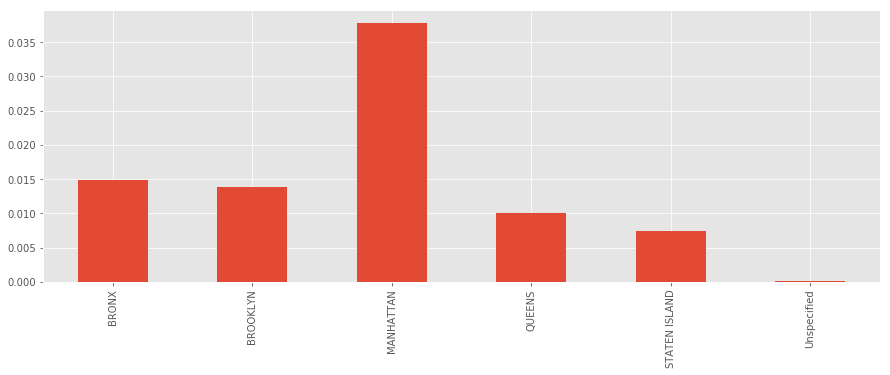

In [50]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

<div style="
color: blue;
padding: 10px;
border: blue 3px solid;
border-radius: 10px;
     width:50%">
    
<h1>How many ride their bike per day?</h1>
</div>



For this problem we'll need to group out dataframe into subsets. We will learn the `groupby` method.

First, we need to load up the data. We've done this before.

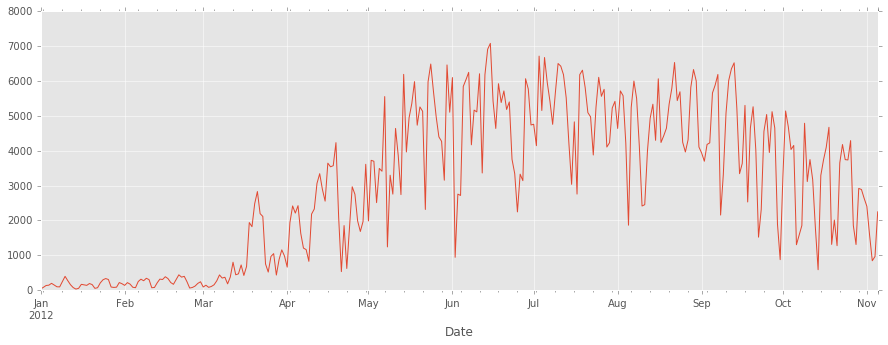

In [28]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a pretty important bike path. I use it mostly on my way to the library now, but I used to take it to work sometimes when I worked in Old Montreal. 

So we're going to create a dataframe with just the Berri bikepath in it

In [29]:
berri_bikes = bikes[['Berri 1']].copy()

In [30]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [31]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [32]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

We actually want the weekday, though:

In [33]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [34]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby or Excel groupby, if you're familiar with those. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [35]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [36]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


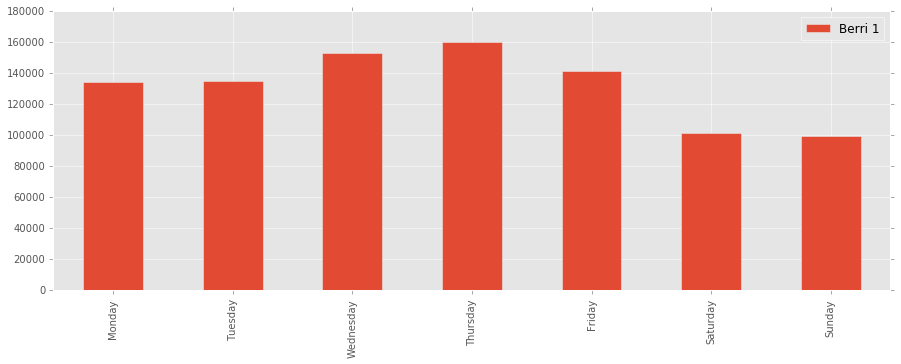

In [37]:
weekday_counts.plot(kind='bar')